# Olympic Athlete Data
## Description
This notebook takes the raw Olympic athlete data and creates clean files for use in the analytics notebook

### Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import os
from pprint import pprint
import matplotlib.pyplot as plt

### Import Raw file, get count

In [2]:
# athlete events df from csv
athletes_file = os.path.join("..","data", "rawData","athlete_events.csv")
athletes_df = pd.read_csv(athletes_file, encoding="ISO-8859-1")

# To get the raw data count, commented out to keep the original df .head() results prominent
raw_count = len(athletes_df)

# preview the raw data
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Import country code list

In [3]:
# athlete events df from csv
country_file = os.path.join("..","data", "rawData","noc_regions.csv")
country_df = pd.read_csv(country_file, encoding="ISO-8859-1")

# preview the raw data
country_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


### Winter, Summer, or Both?

Our first analysis centered around the Season of the games in our data.  We batted ideas around like, it's possible that there is a bias in Winter sports because not every country has the opportunity/capitol/etc.  But before we started down that path, we looked to see how much data we had of each:

Summer: 222,552 (82%)
Winter:  48,564 (18%)

In [4]:
# checking to see how much data we have for each season
season_df = pd.DataFrame(athletes_df.groupby('Season')['ID'].count())

# rename column (yay, found it in the class exercise!)
season_df = season_df.rename(columns={"ID":"Row Count"})

# adding a column for overall percentage
season_df['Percent of Total'] = (100*(season_df['Row Count']/raw_count)).round(1)

# look at %'s'
season_df.head()

,Row Count,Percent of Total
Season,,
Summer,222552,82.1
Winter,48564,17.9


### Zoom in by winter, which years have data?
We made some observations based off of the winter data:
- 1994 is when the winter games started staggering with Summer
- The winter games, in # of athletes and # of events, is on the rise

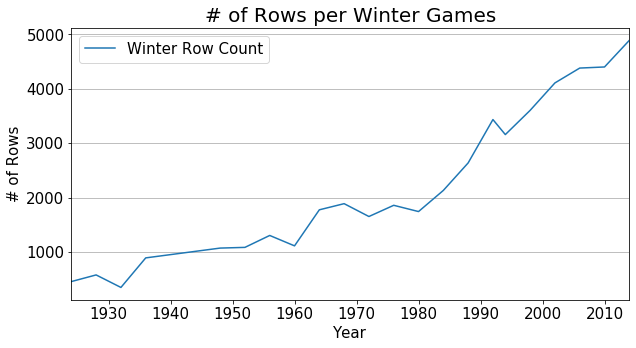

In [5]:
# seperate winter from all
winter_df = athletes_df.loc[athletes_df['Season']=='Winter']

# group by winter-year, getting row counts
winter_year = pd.DataFrame(winter_df.groupby('Year')['ID'].count().reset_index())

# rename row counts
winter_year = winter_year.rename(columns={'ID':'Winter Row Count'})

# winter_year.head()

winterRows_chart = winter_year.plot(
    x='Year',
    y='Winter Row Count',
    figsize=(10,5),
    fontsize=15
)

winterRows_chart.set_xlabel("Year", fontsize=15)
winterRows_chart.set_ylabel('# of Rows', fontsize = 15)
winterRows_chart.yaxis.grid(True)
winterRows_chart.legend(loc='best',fontsize=15)
winterRows_chart.set_title('# of Rows per Winter Games',fontdict={'fontsize': 20, 'fontweight': 'medium'})

winterRows_chart.get_figure().savefig('..\images\winter_athlete_rowCount.png')


### might as well look to see if summer data is ok...

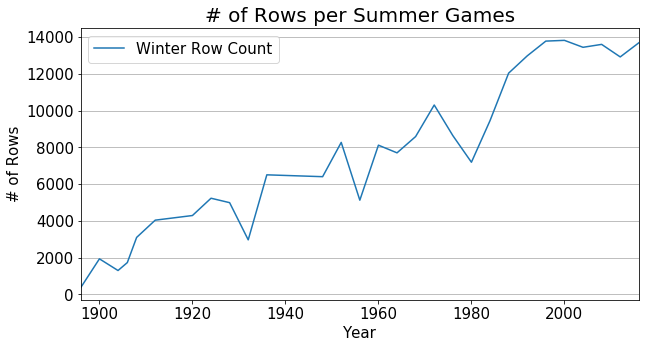

In [6]:
# seperate winter from all
summer_df = athletes_df.loc[athletes_df['Season']=='Summer']

# group by winter-year, getting row counts
summer_year = pd.DataFrame(summer_df.groupby('Year')['ID'].count().reset_index())

# rename row counts
summer_year = summer_year.rename(columns={'ID':'Winter Row Count'})

# winter_year.head()

summerRows_chart = summer_year.plot(
    x='Year',
    y='Winter Row Count',
    figsize=(10,5),
    fontsize=15
)

summerRows_chart.set_xlabel("Year", fontsize=15)
summerRows_chart.set_ylabel('# of Rows', fontsize = 15)
summerRows_chart.yaxis.grid(True)
summerRows_chart.legend(loc='best',fontsize=15)
summerRows_chart.set_title('# of Rows per Summer Games',fontdict={'fontsize': 20, 'fontweight': 'medium'})

summerRows_chart.get_figure().savefig('..\images\summer_athlete_rowCount.png')


### Goodbye Snow/Ice!

Since we had so much more summer data, plus other factors (Winter games used to share the same 4 year cycle, now the alternate...blah...blah), we decided to remove the Winter games from our data.  The new summer only data frame has 222,552 rows.

In [7]:
# New data fram to store the summer data only, using "loc"
summer_df = athletes_df.loc[athletes_df['Season']=='Summer']

# get length of summer, just to verify
summer_count = len(summer_df)

# print once just to verify
# print(summer_count)

# Preview of Summer data
summer_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


### We know there are null heights, but we still want a snapshot of the avg Olympian vs the Global population.
Prepping datasets to chart in the next cells.  We want avg heights for all male Olympians and global population.

In [35]:
# grab world male population average height data
world_male_file = os.path.join("..","data", "cleanData","Mens_WorldHeight_AllYears.csv")
world_male_df = pd.read_csv(world_male_file, encoding="ISO-8859-1")

# trim down to columns we need
world_male_df = world_male_df[['Olympic Year','Mean height (inches)']]

# rename the column
world_male_df = world_male_df.rename(columns={'Mean height (inches)':'Mortals'})

# get the average per year
world_male_avg = pd.DataFrame(world_male_df.groupby('Olympic Year')['Mortals'].mean().reset_index())

world_male_avg = world_male_avg.rename(columns={'Olympic Year':'Year'})

# get the average male olympic athlete height
male_avg = pd.DataFrame(summer_df.groupby('Year')['Height'].mean().reset_index())

# rename and convert
male_avg['Height'] = male_avg['Height'].apply(lambda x: x / 2.54)
male_avg = male_avg.rename(columns={'Height':'Gods'})
male_avg.head()
# .groupby('Olympic Year')['Mean Height (inches)'].mean().reset_index())
# world_male_avg

,Year,Gods
0,1896,68.007532
1,1900,69.542493
2,1904,69.208162
3,1906,70.159931
4,1908,69.898881


### Merge the two, and chart.

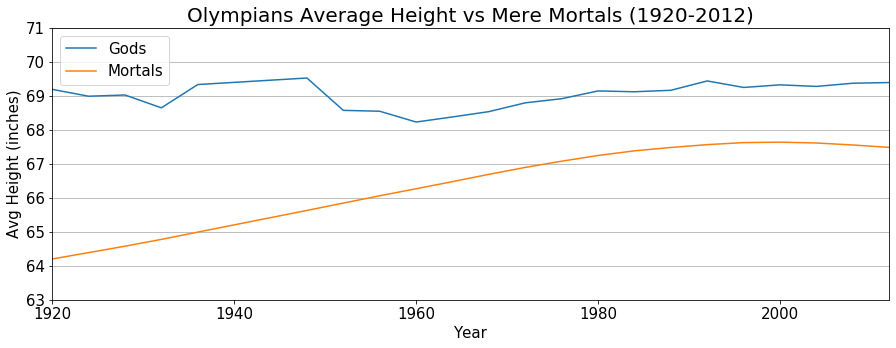

In [66]:
# plot the olympic avg height vs the mortals, notice the ends are chopped off, this is due to the offset
chart_df = world_male_avg.merge(male_avg,on='Year')

# chart_df

# create the chart of avg height for Olympians and the Global population
gods_mortals_chart = chart_df.plot(
    x='Year',
    y=['Gods','Mortals'],
    figsize=(15,5),
    fontsize=15,
    xlim = (1920,2012),
    ylim = (63,71)
)

# format chart, title, labels, tickmarks, oh my
gods_mortals_chart.set_xlabel("Year", fontsize=15)
gods_mortals_chart.set_ylabel('Avg Height (inches)', fontsize = 15)
gods_mortals_chart.yaxis.grid(True)
gods_mortals_chart.legend(loc='best',fontsize=15)
# i cannot get this to work!  the x-ticks keep chopping off the last few years
# gods_mortals_chart.set_xticklabels(chart_df['Year'])
gods_mortals_chart.set_title('Olympians Average Height vs Mere Mortals (1920-2012)',fontdict={'fontsize': 20, 'fontweight': 'medium'})

gods_mortals_chart.get_figure().savefig('..\images\gods_mortals_chart.png')


### Time to delete all NaN, or Null, values without any investigation (just kidding Chris!)
#### Missing Heights
We noticed right away that some of the height values were missing, particularly for the older Olympic games.  

In [10]:
# looking at records missing height
missing_df = summer_df.loc[summer_df['Height'].isnull()]
# missing_df.head()

# variable for missing count and percentage
missing_count = len(missing_df)
missing_pct = (100*(int(missing_count) / int(summer_count)))

# print the results...
print(f'Number of athlete/event rows missing the "height" value: {missing_count} {missing_pct}%')

Number of athlete/event rows missing the "height" value: 51857 23.30107121032388%


### See how much this impacts us per Olympic year
We then looked to see how that 23% missing data impacted us by year.  Clearly the height data is suspect prior to 1960...

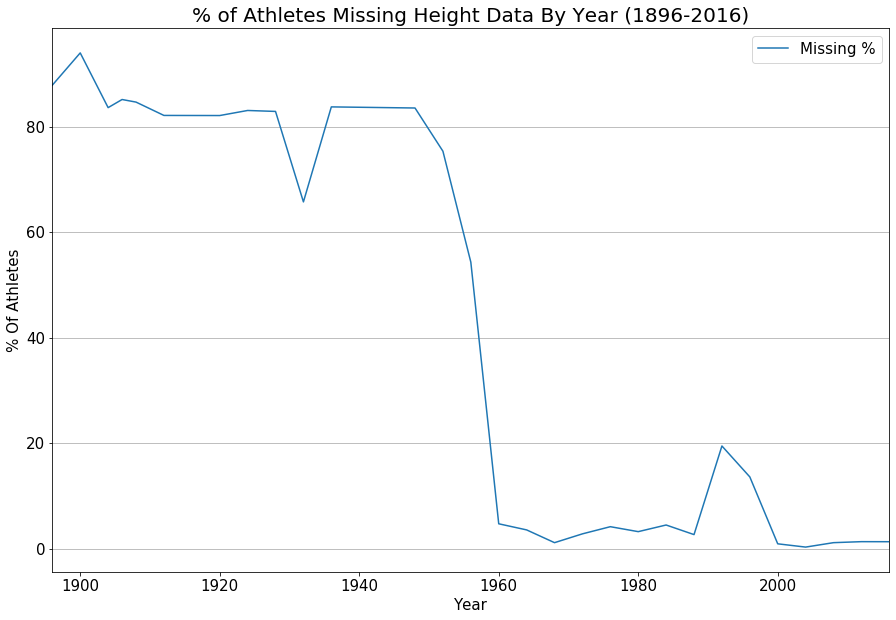

In [69]:
# create a group by object to count the number of missing rows by year
year_missing = pd.DataFrame(missing_df.groupby('Year')['ID'].count().reset_index())

# rename column
year_missing = year_missing.rename(columns={'ID':'Missing Height'})

# make a new df, grouping the summer data by year, counting the ID
year_count = pd.DataFrame(summer_df.groupby('Year')['ID'].count().reset_index())

# a more meaningful name for the total row count by year
year_count = year_count.rename(columns={"ID":"Row Count"})

# merge into new df
year_all = year_count.merge(year_missing,on='Year',how='inner')

# new field for not-missing height (row count - missing height)
year_all['Reporting Height'] = year_all['Row Count'] - year_all['Missing Height']

# add a new column to show missing count
year_all['Missing %'] = (100*(year_all['Missing Height'] / year_all['Row Count'])).round(2)

# check out new df
year_all.head()

# plot on a chart
complete_chart = year_all.plot(
    x='Year',
    y=['Missing %'],
    figsize=(15,10),
    fontsize = 15,
#     ylim = (64,67),
    xlim = (1896, 2016)    
)

complete_chart.set_xlabel("Year", fontsize=15)
complete_chart.set_ylabel('% Of Athletes', fontsize=15)
complete_chart.yaxis.grid(True)
complete_chart.legend(loc='best',fontsize=15) 
complete_chart.set_title('% of Athletes Missing Height Data By Year (1896-2016)', fontdict={'fontsize': 20, 'fontweight': 'medium'})

complete_chart.get_figure().savefig('..\images\height_data_completeness.png')

### Going post-war, hippie era!
#### Focusing on the Summer games from 1960-2016
We decided since all of the games before 1960 were missing at least 50% of their height data, we decided to focus on the 15 games between 1960 and 2016.  We are now down to just 166,267 rows, we hope it's enough!

In [12]:
# New df of just post 60s Summer games
summerModern_df = summer_df.loc[summer_df['Year']>=1960]

# grab the count
summerModern_count = len(summerModern_df)

# we already have view of the same data above, so just print the new row count for now
print(f'In the modern era Summer games data, there are {summerModern_count} rows')

In the modern era Summer games data, there are 166267 rows


### See if remaining missing height data is skewed towards any country
The biggest offenders for not reporting height: Korea, Spain and Romania, each have less than 1% impact on the overall olympic height data.  We believe we can drop these null values without terribly skewing the data.

In [13]:

# create two datasets, one for any row missing height, the other for any row not missing height
summerMissing_df = summerModern_df.loc[summerModern_df['Height'].isnull()]
summerNotMissing_df = summerModern_df.loc[summerModern_df['Height'].notnull()]

# data frames of count of missing/non-missing height data by country
summerMissing_NOC = pd.DataFrame(summerMissing_df.groupby('NOC')['ID'].count().reset_index())
summerNotMissing_NOC = pd.DataFrame(summerNotMissing_df.groupby('NOC')['ID'].count().reset_index())

# rename the columns to be helpful
summerMissing_NOC = summerMissing_NOC.rename(columns={"ID":"Missing Height Count"})
summerNotMissing_NOC = summerNotMissing_NOC.rename(columns={'ID': 'Not Missing Height Count'})

# merge the two, do a left join to get all non-missing...
summerHeight_NOC = summerNotMissing_NOC.merge(summerMissing_NOC, on='NOC',how='left')

# calculate the total (missing + not-missing)
summerHeight_NOC['Total Athletes'] = summerHeight_NOC['Missing Height Count'] + summerHeight_NOC['Not Missing Height Count']

# calculate the missing %
summerHeight_NOC['Missing Height %'] = 100*(summerHeight_NOC['Missing Height Count']/summerHeight_NOC['Total Athletes'])
summerHeight_NOC.head()

# calculate another %, this time of overall athletes to show impact
summerHeight_NOC['Missing Height Impact %'] = 100*(summerHeight_NOC['Missing Height Count']/summerModern_count)
                                                   
# merge with country code data to get country name
summerHeight_NOC = summerHeight_NOC.merge(country_df,on='NOC')

# sort by % missing
summerHeight_NOC = summerHeight_NOC.sort_values(by=['Missing Height Impact %'], ascending=False)

summerHeight_NOC.head()

,NOC,Not Missing Height Count,Missing Height Count,Total Athletes,Missing Height %,Missing Height Impact %,region,notes
106,KOR,3241,345.0,3586.0,9.620747,0.207498,South Korea,NaN
60,ESP,4094,287.0,4381.0,6.551016,0.172614,Spain,NaN
164,ROU,2936,252.0,3188.0,7.904642,0.151563,Romania,NaN
57,EGY,867,218.0,1085.0,20.092166,0.131114,Egypt,NaN
11,AUS,6046,187.0,6233.0,3.000160,0.112470,Australia,NaN


### Dropping those null heights (look away Chris, look away...)
We are down to 158,856 rows...

In [14]:
# the dreaded drop nulls call...
summerClean_df = summerModern_df.dropna(how='any',subset=['Height'])

# get the count
summerClean_count = len(summerClean_df)

# preview the new df
summerClean_df.head()

# print the row count
print(f'There are {summerClean_count} rows left!')

There are 158856 rows left!


### Converting that crazy metric stuff...
#### replacing the metric height and weight with the correct values!  Also adding new columns for medaling, yes or now
Cleaning the data, and adding a new column for categorical analysis

In [15]:
# converting metric to the correct system
type(summerClean_df)

summerClean_df['Height'] = summerClean_df['Height'].apply(lambda x: x / 2.54)
summerClean_df['Weight'] = summerClean_df['Weight'].apply(lambda x: x / .453592)

# Adding a new column based on whether or not the athlete medaled in the event
summerClean_df.loc[summerClean_df.Medal.isnull(), 'MedalYN']='No'
summerClean_df.loc[summerClean_df.Medal.notnull(), 'MedalYN']='Yes'

# adding a new sub-event column to get the specific event (i.e. "shotput")

# # preview
summerClean_df.head()

C:\Users\18324\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\18324\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\18324\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,MedalYN
0,1,A Dijiang,M,24.0,70.866142,176.369954,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,No
1,2,A Lamusi,M,23.0,66.929134,132.277465,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,No
31,12,Jyri Tapani Aalto,M,31.0,67.716535,154.323709,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN,No
32,13,Minna Maarit Aalto,F,30.0,62.598425,122.356655,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,No
33,13,Minna Maarit Aalto,F,34.0,62.598425,122.356655,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,No


### Splitting up the sexes...

In [16]:
# olympic data for women
womens_data = summerClean_df.loc[summerClean_df['Sex']=='F']

# olympic data for men only...
mens_data = summerClean_df.loc[summerClean_df['Sex']=='M']

# get the count of data sets
mens_count = len(mens_data)
womens_count = len(womens_data)

print(f'There are {womens_count} rows for women and {mens_count} for men.')

There are 52526 rows for women and 106330 for men.


### Removing mixed events

In [17]:
# creating new df, mens events only (no mixed)
mens_nonmixed_data = mens_data.loc[~mens_data['Event'].str.contains("Mixed")]
mens_nonmixed_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,MedalYN
0,1,A Dijiang,M,24.0,70.866142,176.369954,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,No
1,2,A Lamusi,M,23.0,66.929134,132.277465,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,No
31,12,Jyri Tapani Aalto,M,31.0,67.716535,154.323709,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN,No
57,18,Timo Antero Aaltonen,M,31.0,74.409449,286.601175,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,NaN,No
81,23,Fritz Aanes,M,22.0,73.622047,196.211573,Norway,NOR,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN,No


### New column, removing gender from the Event name

In [18]:
# series of events with the word "Men's" replaced
subevents_data = mens_nonmixed_data["Event"].replace("Men's ","",regex=True)

# creating new field to store that series
mens_nonmixed_data["Sub Event"] = subevents_data
mens_nonmixed_data.head()

C:\Users\18324\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,MedalYN,Sub Event
0,1,A Dijiang,M,24.0,70.866142,176.369954,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,No,Basketball Basketball
1,2,A Lamusi,M,23.0,66.929134,132.277465,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,No,Judo Extra-Lightweight
31,12,Jyri Tapani Aalto,M,31.0,67.716535,154.323709,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN,No,Badminton Singles
57,18,Timo Antero Aaltonen,M,31.0,74.409449,286.601175,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,NaN,No,Athletics Shot Put
81,23,Fritz Aanes,M,22.0,73.622047,196.211573,Norway,NOR,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN,No,"Wrestling Light-Heavyweight, Greco-Roman"


### Looking at Event data
There are 84 men's events that occur in each Olympics from 1960-2016

In [19]:
# gruop by event and year (gender is imbedded in event)
eventYear = pd.DataFrame(mens_nonmixed_data.groupby(['Sub Event','Year'])['ID'].count().reset_index())

# rename column
eventYear = eventYear.rename(columns={"ID":"Row Count"})

# now aggregate by event, counting the # of olympics that they appear in
eventCount = pd.DataFrame(eventYear.groupby('Sub Event')['Year'].count().reset_index())

# rename colun
eventCount = eventCount.rename(columns={'Year':'Games Count'})

# pull out only events that occur in all 15 Summer Olympics (1960-2016)
subEvents = eventCount.loc[eventCount['Games Count']==15]

subEvent_count = len(subEvents)

print(f'There are {subEvent_count} Events that occur in all 15 games (1960-2016)')

There are 84 Events that occur in all 15 games (1960-2016)


### Zoom in on those 84 events...
This will be the clean data file we use in the combined anlaysis.

In [20]:
# create final, clean df for the men's data in only the 84 events by merge
mensData_df = mens_nonmixed_data.merge(subEvents,on='Sub Event',how='inner')

# save clean file to folder
mens_file = os.path.join("..", "data", "cleanData", "Mens_OlympicData_1960_2016.csv")
mensData_df.to_csv(mens_file, index=False, header=True)

# preview the data
mensData_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,MedalYN,Sub Event,Games Count
0,1,A Dijiang,M,24.0,70.866142,176.369954,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,No,Basketball Basketball,15
1,136,Alessandro Abbio,M,29.0,76.771654,187.393076,Italy,ITA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN,No,Basketball Basketball,15
2,192,Ahmed El-Sayed Abdel Hamid Mobarak,M,25.0,74.409449,187.393076,Egypt,EGY,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,NaN,No,Basketball Basketball,15
3,199,Amir Abdel Meguid,M,23.0,70.078740,147.709836,Egypt,EGY,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,NaN,No,Basketball Basketball,15
4,199,Amir Abdel Meguid,M,27.0,70.078740,147.709836,Egypt,EGY,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,NaN,No,Basketball Basketball,15
